# paper: FRB 220418aaai

In [1]:
import sys
sys.path.insert(1, '/home/ubuntu/gechen/software/burstfit/examples/')
import import_ipynb
import BurstFit_paper_template as paper_fit

from burstfit.utils.functions import pulse_fn, sgram_fn_vec, sgram_fn, gauss, gauss_norm, model_free_4, model_free_normalized_4, power_law # pulse_fn_vec  
import numpy as np

%matplotlib inline 

importing Jupyter notebook from BurstFit_paper_template.ipynb


/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/burstfit-0.1.1-py3.6.egg/burstfit/utils/plotter.py:9: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/ubuntu/anaconda3/envs/casa/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/ubuntu/anaconda3/envs/casa/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/traitlets/config/application.py", line 664, in launch_instance
    app.start()
  File "/home/ubuntu/anac

datacite/tind env not found. Cannot use datacite API


In [2]:
# input variables 
candidate = '220418aaai'
datestring = '2022_4_18_4_58_12'
beam = 66
corr = 'corr02'
dm_heimdall = 623.45 #624.1
width_heimdall = 4 
snr_heimdall = 10.4
voltage = True
dedisperse = True 
fil_file = '/home/ubuntu/vikram/scratch/' + candidate + '.fil'
mask_chans=[] 

In [3]:
# def dedisperse(data,dm,fch1=1498.75,reffreq=1530.,nf=6144,df=0.03051757812,nt=32768,dt=32.768e-3):
#     # calculate number of samples in output
#     delay = 4.15*dm*((1e-3*(fch1-(nf-1)*df))**(-2.) - (1e-3*reffreq)**(-2.))
#     nsamp_delay = int(delay/dt)-1
#     nsamp_output = nt-nsamp_delay
#     print(‘outputting samples:’,nsamp_output)
#     # form output
#     output_data = np.zeros((nf,nsamp_output))
#     for i in np.arange(nf):
#         f = 1e-3*(fch1-i*df)
#         delay_samples = 4.15*dm*(f**(-2.) - (1e-3*reffreq)**(-2.))/dt
#         x = np.arange(nsamp_output)+delay_samples
#         xp = np.arange(nt)
#         fp = data[i,:]
#         output_data[i,:] = np.interp(x,xp,fp)
#     return output_data

2022-06-09 23:10:11,136 - prepare_data -burstfit.data - INFO - Preparing data for burst fitting.
2022-06-09 23:10:11,299 - crop_dedispersed_data -burstfit.data - INFO - Cropping data with time_window: 0.2s.
2022-06-09 23:10:11,302 - normalise_data -burstfit.data - INFO - Normalising data using off pulse mean and std.
2022-06-09 23:10:11,324 - normalise_data -burstfit.data - INFO - Off pulse mean and std are: (26.147503299593303, 24.17004590924622)


using filterbank  /data/dsa110/T1/corr02/2022_4_18_4_58_12/fil_220418aaai/220418aaai_66.fil


2022-06-09 23:10:11,337 - prepare_data -burstfit.data - INFO - Preparing data for burst fitting.
2022-06-09 23:10:16,296 - crop_dedispersed_data -burstfit.data - INFO - Cropping data with time_window: 0.2s.
2022-06-09 23:10:16,299 - normalise_data -burstfit.data - INFO - Normalising data using off pulse mean and std.
2022-06-09 23:10:18,502 - normalise_data -burstfit.data - INFO - Off pulse mean and std are: (49.5635093350566, 35.18433633225558)


using filterbank  /home/ubuntu/vikram/scratch/220418aaai.fil
/home/ubuntu/vikram/scratch/220418aaai.fil
nfreq= 6144


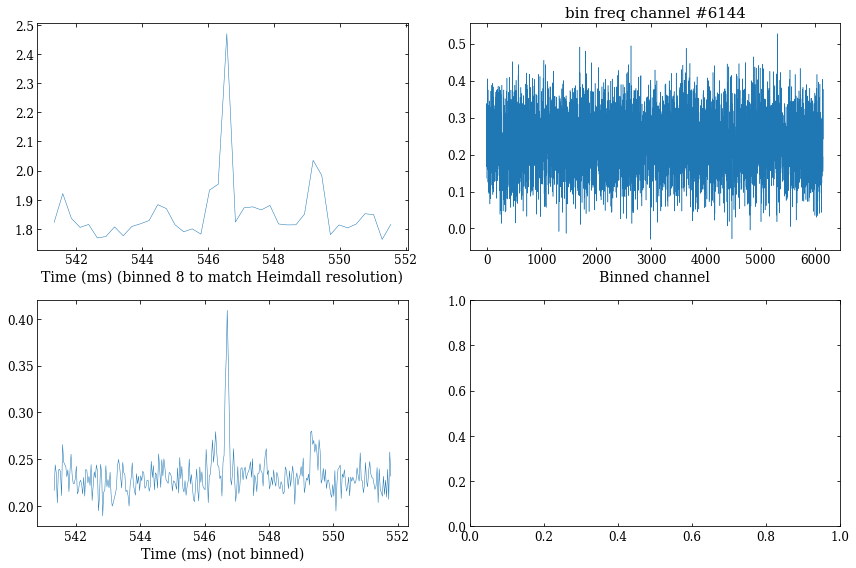

In [4]:
bd_heimdall, fil_file_heimdall  = paper_fit.prepare_bd(candidate, dm_heimdall, width_heimdall, snr_heimdall, 
                           datestring=datestring, beam=beam, corr=corr, 
                           fil_file=fil_file, voltage=False)

bd, fil_file  = paper_fit.prepare_bd(candidate, dm_heimdall, width_heimdall, snr_heimdall, 
                           datestring=datestring, beam=beam, corr=corr, 
                           fil_file=fil_file, voltage=True)

nfreq = bd.nchans
fil_file_dedispersed = '/home/ubuntu/gechen/software/burstfit/fil_files_dedispersed/%s_%d_%s.txt'%(candidate, nfreq, str(voltage))

print(fil_file)
print("nfreq=", nfreq) 

data_burst = paper_fit.prepare_burst_data(fil_file, fil_file_dedispersed, candidate, bd_heimdall, bd, voltage = voltage,
                                t_chop_center_s=0.5, t_chop_width = 10 * width_heimdall, 
                               dedisperse=dedisperse, nfreq = nfreq)

In [6]:
np.shape(data_burst)

(6144, 320)